Music Genre Predictor

In [68]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#methods for saving and loading models
from sklearn.externals import joblib
from sklearn import tree

In [1]:
from google.colab import files
files.upload()

Saving music.csv to music.csv


{'music.csv': b'age,gender,genre\n20,1,HipHop\n23,1,HipHop\n25,1,HipHop\n26,1,Jazz\n29,1,Jazz\n30,1,Jazz\n31,1,Classical\n33,1,Classical\n37,1,Classical\n20,0,Dance\n21,0,Dance\n25,0,Dance\n26,0,Acoustic\n27,0,Acoustic\n30,0,Acoustic\n31,0,Classical\n34,0,Classical\n35,0,Classical'}

In [9]:
music_data = pd.read_csv('music.csv')
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [10]:
music_data.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [6]:
music_data.shape

(18, 3)

In [8]:
music_data.values

array([[20, 1, 'HipHop'],
       [23, 1, 'HipHop'],
       [25, 1, 'HipHop'],
       [26, 1, 'Jazz'],
       [29, 1, 'Jazz'],
       [30, 1, 'Jazz'],
       [31, 1, 'Classical'],
       [33, 1, 'Classical'],
       [37, 1, 'Classical'],
       [20, 0, 'Dance'],
       [21, 0, 'Dance'],
       [25, 0, 'Dance'],
       [26, 0, 'Acoustic'],
       [27, 0, 'Acoustic'],
       [30, 0, 'Acoustic'],
       [31, 0, 'Classical'],
       [34, 0, 'Classical'],
       [35, 0, 'Classical']], dtype=object)

#Clean Prepare data - Remove duplicates or split 


In [13]:
#Split input set and output set(predictions)
# X(input set) is used by convention to represent data set

X = music_data.drop(columns=['genre'])
X
#output data convention is - y
y= music_data['genre']
y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

In [15]:
#create a model using machine learning algorithm 
#decisicion tree
model = DecisionTreeClassifier()
#train it 
model.fit(X,y)
#inspect our music data 
#music_data



,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [19]:
# make predictions
# genres for male 21 and female 22 
predictions = model.predict([[21 , 1], [22 , 0]])
predictions

array(['HipHop', 'Dance'], dtype=object)

In [60]:
#Measure accuracy of a model
#function returns a tuple(we can unpack)
#low test size
X_train , X_test , y_train, y_test =train_test_split(X,y , test_size = 0.2)
#high test size
#X_train , X_test , y_train, y_test =train_test_split(X,y , test_size = 0.8)
# Allocate 70 - 80 % of data for training and 20 - 30% for predictions 
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
#Pass  the untrained data set instead of a few for testing 
predictions = model.predict(X_test)
predictions

# Compare the test set(values will be between 0 to 1 )
#expected values - y_test 
#actual values - predictions

score  = accuracy_score(y_test , predictions)
score 


0.5

In [62]:
#Persisting Models
#two parameters model and name we want to save our file
joblib.dump( model , 'music_recommender.joblib')



['music_recommender.joblib']

In [63]:
#load our file
model = joblib.load('music_recommender.joblib')
#make a prediction
predictions = model.predict([[21 , 1], [22 , 0]])
predictions

array(['HipHop', 'Dance'], dtype=object)

In [71]:
#visualizing decision trees 
music_data = pd.read_csv('music.csv')
X = music_data.drop(columns=['genre'])
y= music_data['genre']

model = DecisionTreeClassifier()
model.fit(X,y)

tree.export_graphviz(model , out_file='music-recommender.dot', 
                     feature_names= ['age' ,'gender'], 
                     class_names=sorted(y.unique()),
                     label='all',
                     rounded = True, 
                     filled=True)

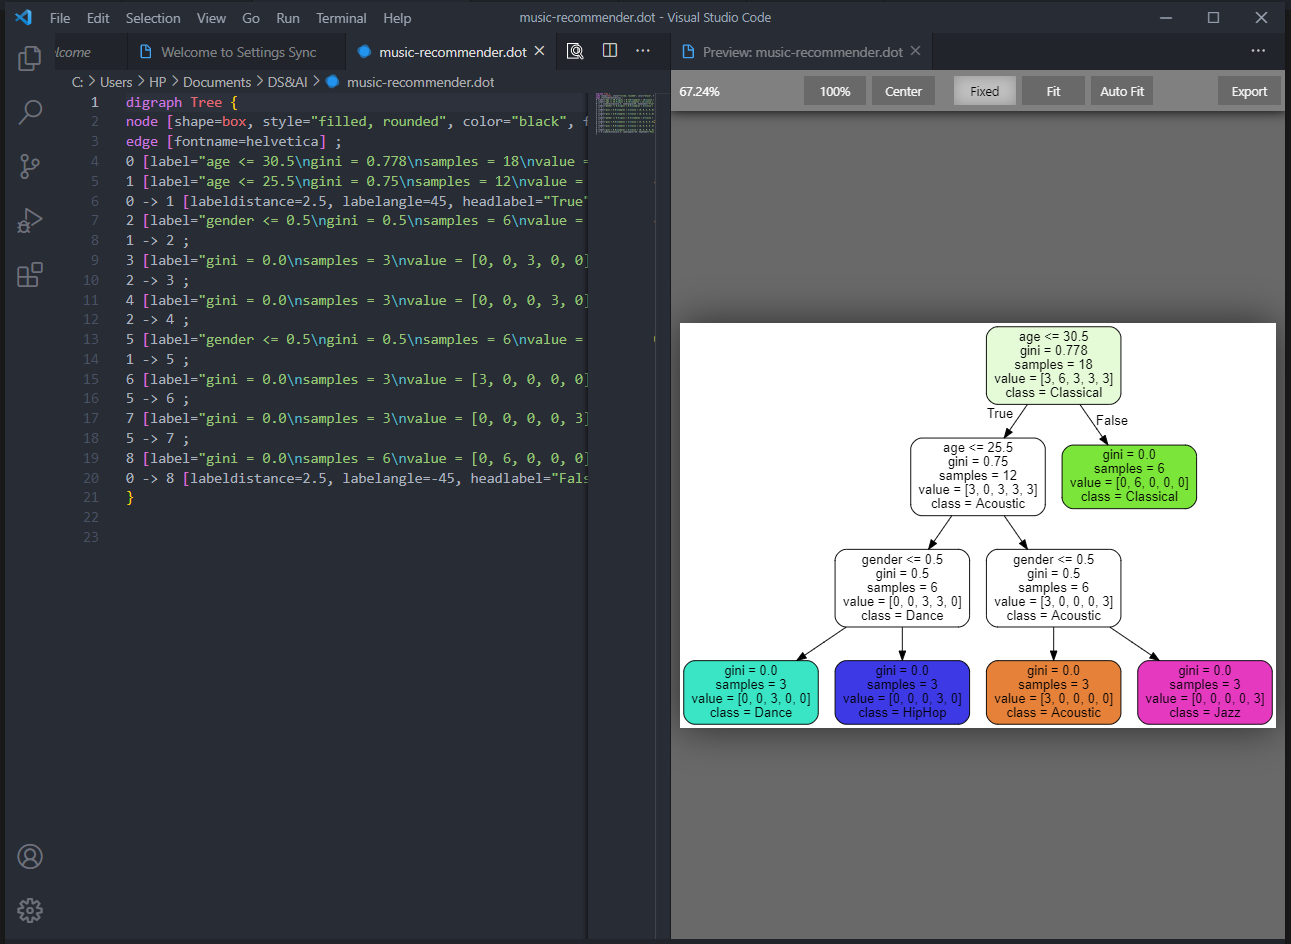